 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sn


%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Create the file path to read the CSV into a Data frame

In [3]:
whale_csv = Path("C:/Users/sambu/Module 4 Assignment/Module-4-Challange/Resources/whale_returns.csv")

In [4]:
# Reading whale returns
whale_df = pd.read_csv(whale_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
# set dates in ascending order
whale_df = whale_df.sort_index()
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Checking for null
whale_df.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [6]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [7]:
# Drop nulls
whale_df = whale_df.dropna().copy()
whale_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [8]:
# Reading algorithmic returns
csvpath_algo = Path("C:/Users/sambu/Module 4 Assignment/Module-4-Challange/Resources/algo_returns.csv")
algo_df = pd.read_csv(csvpath_algo, index_col="Date", infer_datetime_format=True, parse_dates=True)
# set dates in ascending order
algo_df = algo_df.sort_index()
algo_df.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [9]:
#Sorting the index 
algo_df = algo_df.sort_index()
algo_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [10]:
# Checking for null
algo_df.isnull()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [11]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [12]:
# Drop nulls
algo_df = algo_df.dropna().copy()
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [13]:
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [14]:
# Reading S&P TSX 60 Closing Prices
tsx_csv = Path("C:/Users/sambu/Module 4 Assignment/Module-4-Challange/Resources/sp_tsx_history.csv")
tsx_df = pd.read_csv(tsx_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
tsx_df = tsx_df.sort_index()
tsx_df.head(10)

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
2012-10-09,"$12,273.57"
2012-10-10,"$12,212.42"
2012-10-11,"$12,233.95"
2012-10-12,"$12,202.04"


In [15]:
#Sorting the index 
tsx_df = tsx_df.sort_index()
tsx_df

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [16]:
# Check Data Types
tsx_df.dtypes

Close    object
dtype: object

In [17]:
# Fix Data Typest
tsx_df['Close'] = tsx_df['Close'].replace(r'[$,]','',regex=True).astype('float64')
tsx_df.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [18]:
#Checking Data Types
tsx_df.dtypes

Close    float64
dtype: object

In [19]:
# Calculate Daily Returns
tsx_df = tsx_df.pct_change()
tsx_df.sort_index()
tsx_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [20]:
#checking for nulls
tsx_df.isnull()

,Close
Date,
2012-10-01,True
2012-10-02,False
2012-10-03,False
2012-10-04,False
2012-10-05,False
...,...
2019-12-20,False
2019-12-23,False
2019-12-24,False


In [21]:
# Count nulls
tsx_df.isnull().sum()

Close    1
dtype: int64

In [22]:
# Drop nulls
tsx_df = tsx_df.dropna().copy()
tsx_df.isnull().sum()


Close    0
dtype: int64

In [23]:
tsx_df.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [24]:
#Rename `Close` Column to be specific to this portfolio.
tsx_df.columns = ['daily returns']
tsx_df.head()

,daily returns
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [25]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_data = pd.concat([whale_df, algo_df, tsx_df], axis="columns", join="inner")
combined_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,daily returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

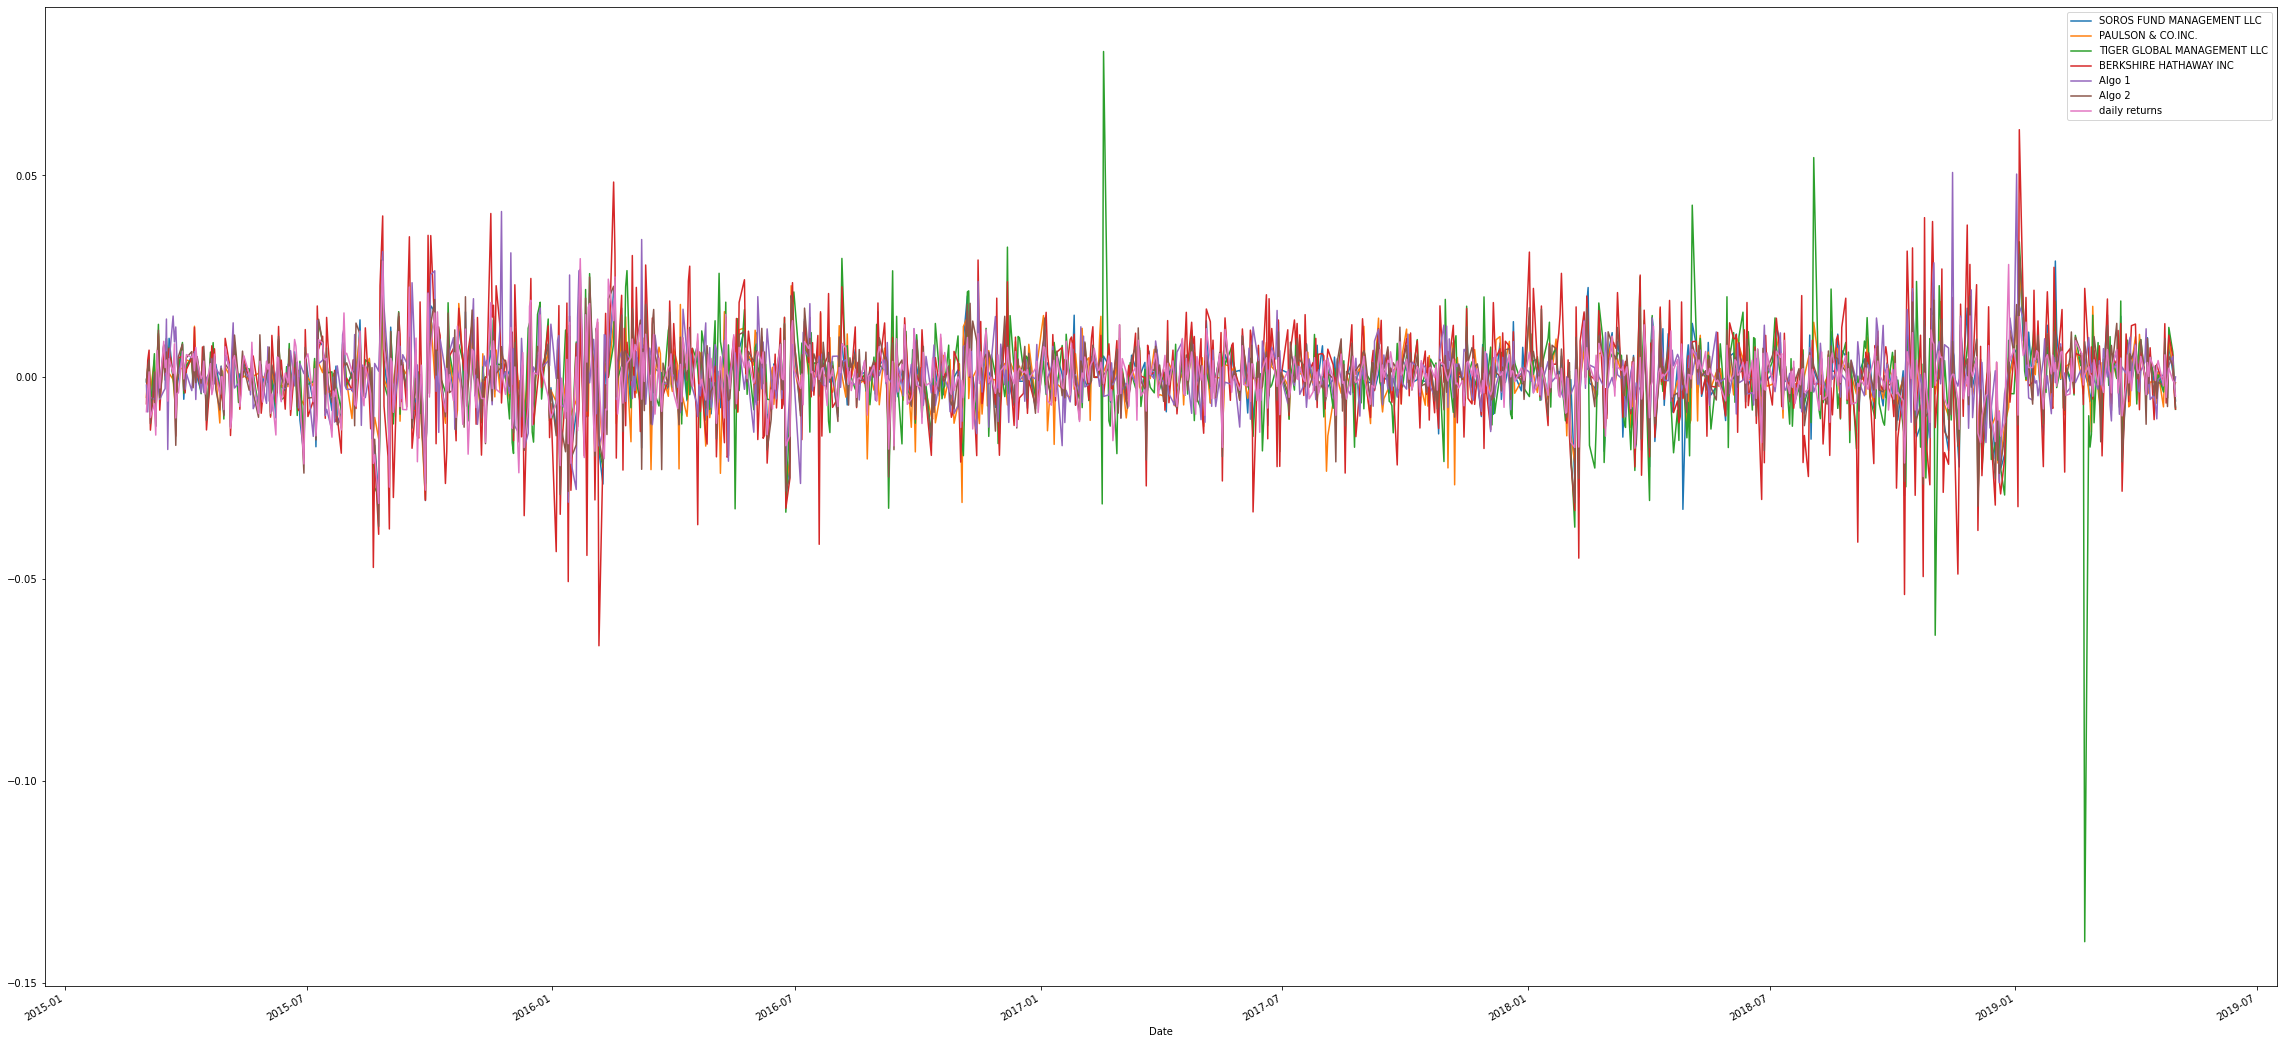

In [26]:
# Plot daily returns of all portfolio
combined_data.plot(figsize=(40,20))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

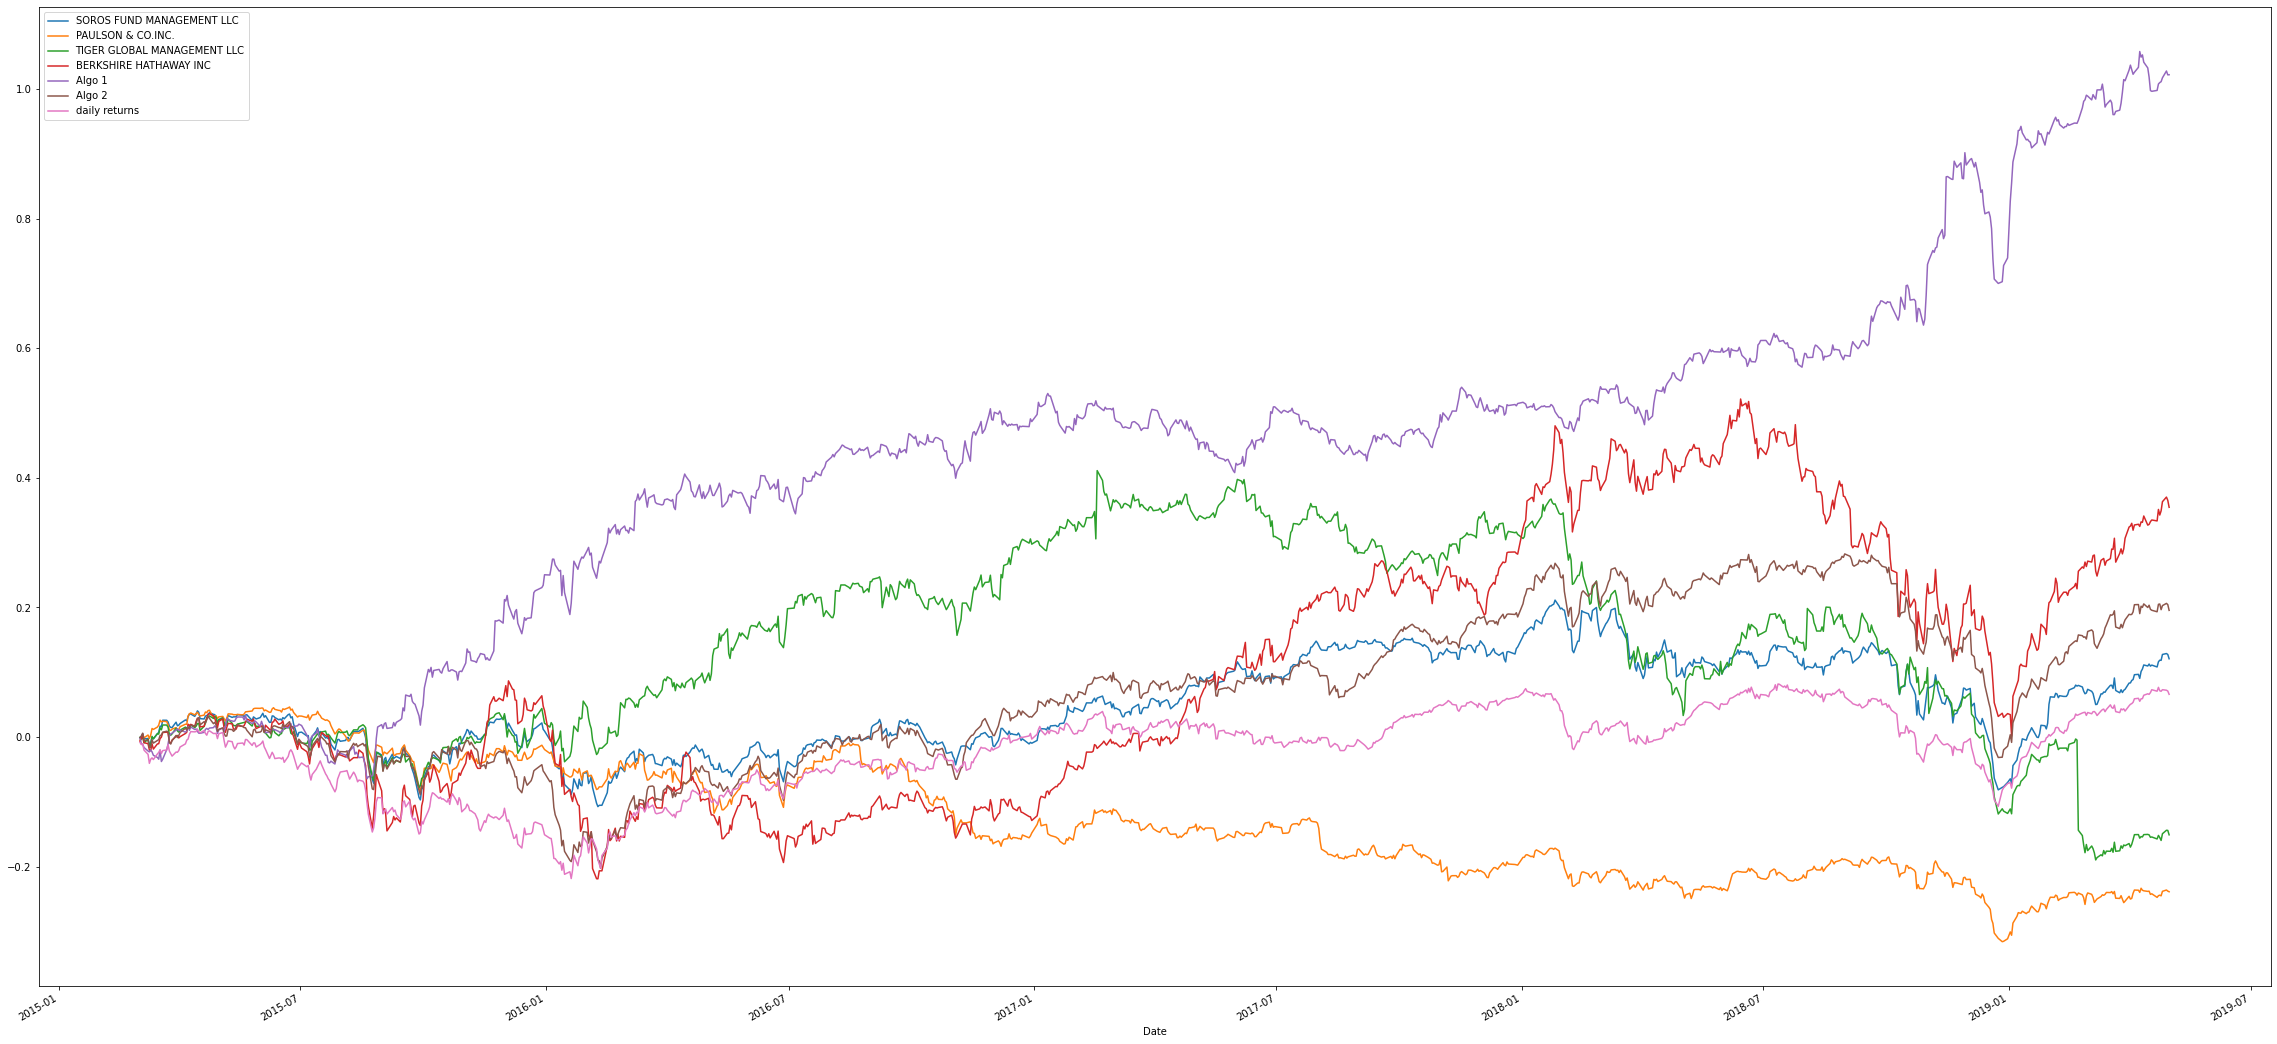

In [27]:
# Calculate cumulative returns of all portfolios
combined_data = (1 + combined_data.sort_index()).cumprod()-1
# Plot cumulative returns
combined_data.plot(figsize=(40,20))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

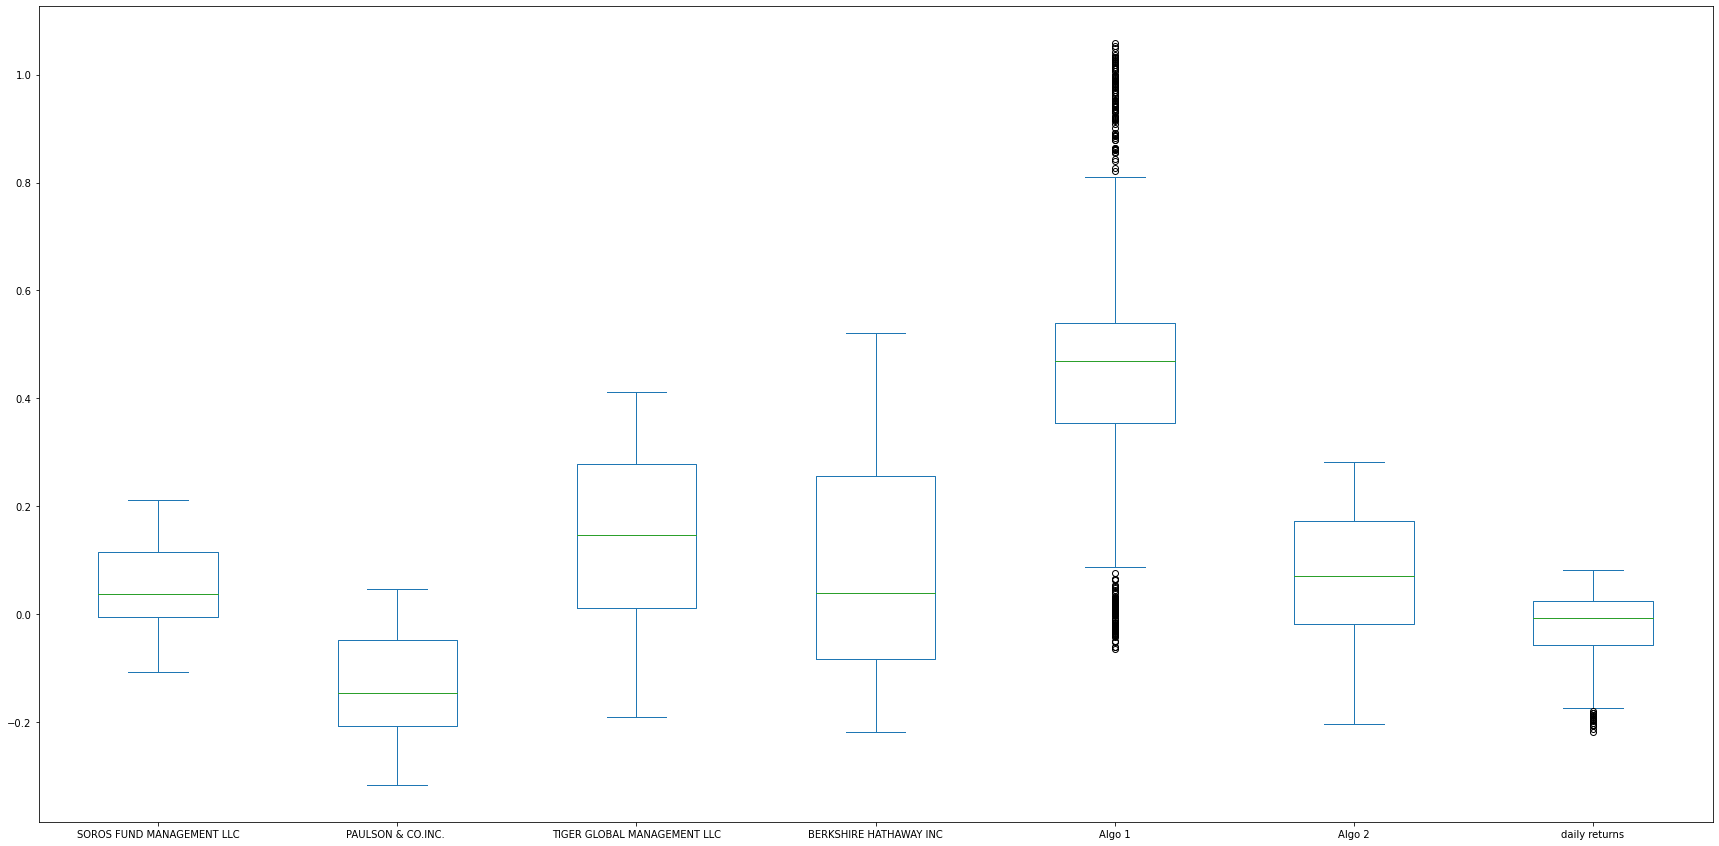

In [28]:
# Box plot to visually show risk
combined_data.plot.box(figsize=(30,15))

### Calculate Standard Deviations

In [29]:
# Calculate the daily standard deviations of all portfolios
combined_data_std = combined_data.std()
combined_data_std

SOROS FUND MANAGEMENT LLC      0.070271
PAULSON & CO.INC.              0.090735
TIGER GLOBAL MANAGEMENT LLC    0.148722
BERKSHIRE HATHAWAY INC         0.196871
Algo 1                         0.258839
Algo 2                         0.116607
daily returns                  0.064354
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [30]:
# Calculate  the daily standard deviation of S&P TSX 60
tsx_df_std= tsx_df.std()
tsx_df_std

daily returns    0.006637
dtype: float64

In [31]:
combined_data_std

SOROS FUND MANAGEMENT LLC      0.070271
PAULSON & CO.INC.              0.090735
TIGER GLOBAL MANAGEMENT LLC    0.148722
BERKSHIRE HATHAWAY INC         0.196871
Algo 1                         0.258839
Algo 2                         0.116607
daily returns                  0.064354
dtype: float64

In [32]:
# Determine which portfolios are riskier than the S&P TSX 60
combined_data_std[(combined_data_std['daily returns'] < combined_data_std)]

SOROS FUND MANAGEMENT LLC      0.070271
PAULSON & CO.INC.              0.090735
TIGER GLOBAL MANAGEMENT LLC    0.148722
BERKSHIRE HATHAWAY INC         0.196871
Algo 1                         0.258839
Algo 2                         0.116607
dtype: float64

### Calculate the Annualized Standard Deviation

In [33]:
# Calculate the annualized standard deviation (252 trading days)
combined_data_std#(window=252).std()

SOROS FUND MANAGEMENT LLC      0.070271
PAULSON & CO.INC.              0.090735
TIGER GLOBAL MANAGEMENT LLC    0.148722
BERKSHIRE HATHAWAY INC         0.196871
Algo 1                         0.258839
Algo 2                         0.116607
daily returns                  0.064354
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

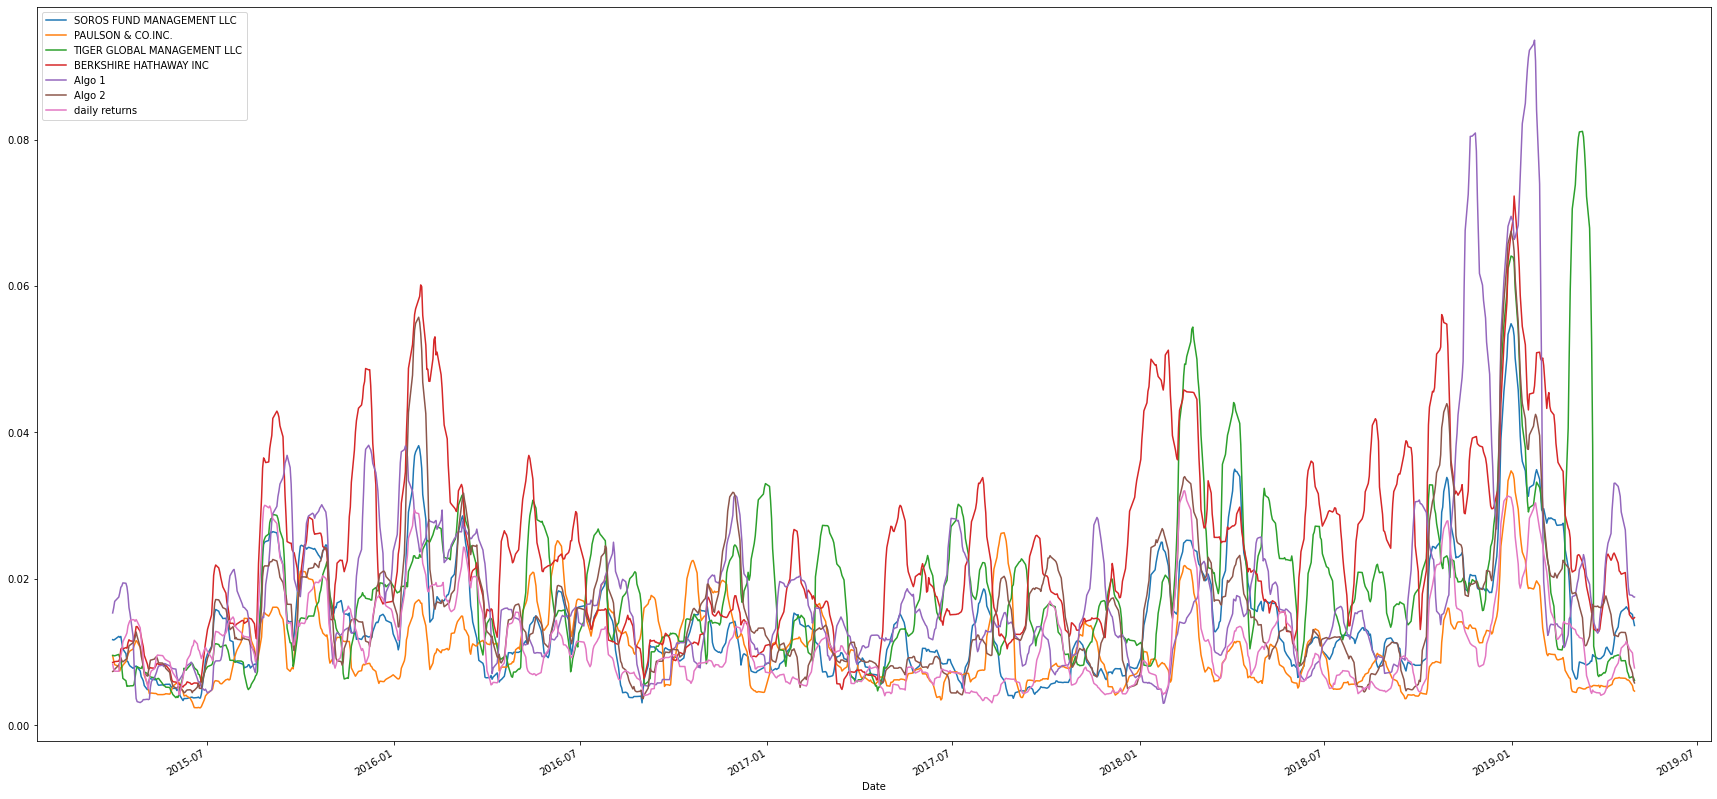

In [34]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window and plot the standard Deviation
combined_data.rolling(window=21).std().plot(figsize=(30,15))

### Calculate and plot the correlation

In [35]:
# Calculate the correlation
correlation = combined_data.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,daily returns
SOROS FUND MANAGEMENT LLC,1.000000,-0.599250,0.428731,0.879331,0.419924,0.898351,0.809598
PAULSON & CO.INC.,-0.599250,1.000000,-0.167546,-0.710741,-0.876459,-0.736731,-0.604204
TIGER GLOBAL MANAGEMENT LLC,0.428731,-0.167546,1.000000,0.064462,0.047300,0.242755,0.370814
BERKSHIRE HATHAWAY INC,0.879331,-0.710741,0.064462,1.000000,0.524672,0.920725,0.720103
Algo 1,0.419924,-0.876459,0.047300,0.524672,1.000000,0.590275,0.528311
Algo 2,0.898351,-0.736731,0.242755,0.920725,0.590275,1.000000,0.886327
daily returns,0.809598,-0.604204,0.370814,0.720103,0.528311,0.886327,1.000000


<AxesSubplot:>

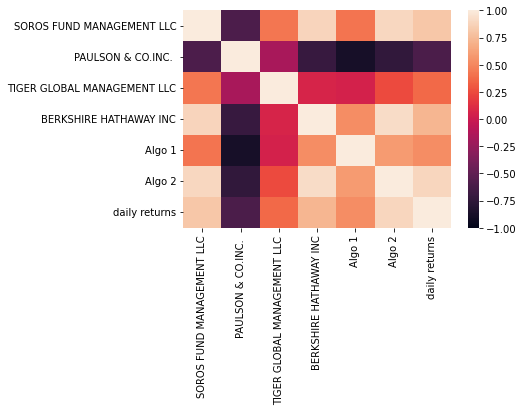

In [36]:
# Display de correlation matrix
sn.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [37]:
# Calculate covariance of a single portfolio - soros and TSX
covariance = combined_data['BERKSHIRE HATHAWAY INC'].cov(tsx_df['daily returns'])
covariance

9.224123202152707e-06

In [38]:
# Calculate variance of S&P TSX
variance = tsx_df['daily returns'].var()
variance

4.405458170898365e-05

In [39]:
# Computing beta
berkshire_beta = covariance / variance
berkshire_beta

0.20937942988735075

<AxesSubplot:title={'center':'Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC'}, xlabel='Date'>

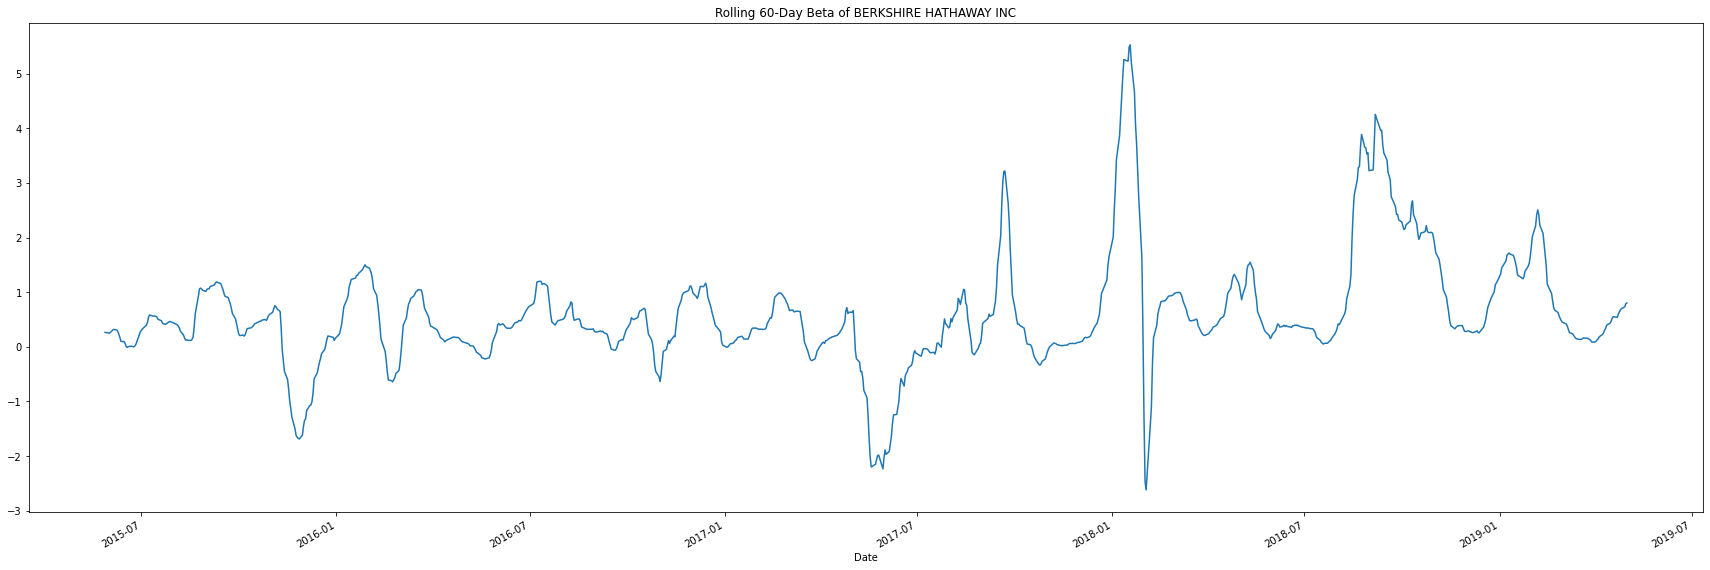

In [40]:
# Plot beta trend
rolling_covariance = combined_data['BERKSHIRE HATHAWAY INC'].rolling(window=30).cov(combined_data['daily returns'])
rolling_variance = combined_data['daily returns'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(30, 10), title='Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [41]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [42]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_data.mean() * 252) / (combined_data.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      11.402242
PAULSON & CO.INC.             -22.381050
TIGER GLOBAL MANAGEMENT LLC    15.001554
BERKSHIRE HATHAWAY INC          8.214824
Algo 1                         27.120044
Algo 2                          9.942376
daily returns                  -5.027228
dtype: float64

<AxesSubplot:title={'center':'Sharp Ratio'}>

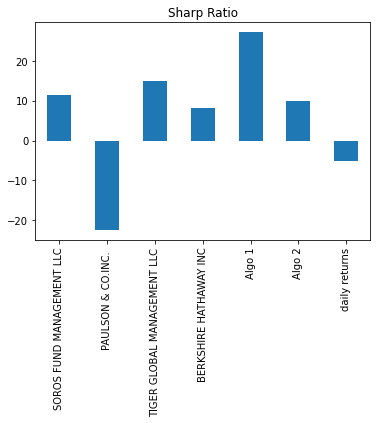

In [43]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharp Ratio")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [44]:
# Reading data from 1st stock
tsla_csv = Path("C:/Users/sambu/Module 4 Assignment/Module-4-Challange/Resources/Google Finance Investment Tracker - Price History.csv")

In [45]:
tsla_df = pd.read_csv(tsla_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)

In [46]:
# set dates in ascending order
tsla_df = tsla_df.sort_index()
tsla_df = tsla_df.drop(columns=['Open', 'High', 'Low', 'Volume'])
tsla_df['Close'] = tsla_df['Close'].replace('[,]','',regex=True).astype('float64')
tsla_df.head()

,Close
Date,
2021-06-21,620.83
2021-06-22,623.71
2021-06-23,656.57
2021-06-24,679.82
2021-06-25,671.87


In [47]:
# Reading data from 2nd stock
msft_csv = Path("C:/Users/sambu/Module 4 Assignment/Module-4-Challange/Resources/Google Finance Investment Tracker - Price History (msft).csv")

In [48]:
msft_df = pd.read_csv(msft_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)

In [49]:
# set dates in ascending order
msft_df = msft_df.sort_index()
msft_df = msft_df.drop(columns=['Open', 'High', 'Low', 'Volume'])
msft_df.head()

,Close
Date,
2021-06-21,262.63
2021-06-22,265.51
2021-06-23,265.27
2021-06-24,266.69
2021-06-25,265.02


In [50]:
# Reading data from 3rd stock
peloton_csv = Path("C:/Users/sambu/Module 4 Assignment/Module-4-Challange/Resources/Google Finance Investment Tracker - Price History (Peleton).csv")

In [51]:
peloton_df = pd.read_csv(peloton_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)

In [52]:
# set dates in ascending order
peloton_df = peloton_df.sort_index()
peloton_df = peloton_df.drop(columns=['Open', 'High', 'Low', 'Volume'])
peloton_df.head()

,Close
Date,
2021-06-21,108.11
2021-06-22,117.17
2021-06-23,117.48
2021-06-24,121.85
2021-06-25,121.49


In [53]:
# Combine all stocks in a single DataFrame
combined_stocks = pd.concat([tsla_df, msft_df, peloton_df], axis="columns", join="inner")
combined_stocks.columns = ["tsla", "msft", "peloton"]
portfolio = combined_stocks.pct_change().sort_index()
portfolio.head()



,tsla,msft,peloton
Date,,,
2021-06-21,NaN,NaN,NaN
2021-06-22,0.004639,0.010966,0.083804
2021-06-23,0.052685,-0.000904,0.002646
2021-06-24,0.035411,0.005353,0.037198
2021-06-25,-0.011694,-0.006262,-0.002954


In [54]:
# Reorganize portfolio data by having a column per symbol
#already coded above
#combined_stocks.columns = ["tsla", "msft", "peloton"]
portfolio.head()

,tsla,msft,peloton
Date,,,
2021-06-21,NaN,NaN,NaN
2021-06-22,0.004639,0.010966,0.083804
2021-06-23,0.052685,-0.000904,0.002646
2021-06-24,0.035411,0.005353,0.037198
2021-06-25,-0.011694,-0.006262,-0.002954


In [55]:
# Calculate daily returns already calculated above - portfolio = combined_stocks.pct_change().sort_index() 
portfolio.head()

,tsla,msft,peloton
Date,,,
2021-06-21,NaN,NaN,NaN
2021-06-22,0.004639,0.010966,0.083804
2021-06-23,0.052685,-0.000904,0.002646
2021-06-24,0.035411,0.005353,0.037198
2021-06-25,-0.011694,-0.006262,-0.002954


In [56]:
# Drop NAs
portfolio = portfolio.dropna().copy()

# Display sample data
portfolio.isnull().sum()

tsla       0
msft       0
peloton    0
dtype: int64

In [57]:
portfolio.tail()

,tsla,msft,peloton
Date,,,
2022-06-13,-0.071022,-0.042413,-0.063749
2022-06-14,0.023887,0.009205,-0.026423
2022-06-15,0.054824,0.029735,0.057411
2022-06-16,-0.085408,-0.026970,-0.067127
2022-06-17,0.017175,0.010940,0.030688


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [58]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_returns = portfolio.dot(weights)

# Display sample data
weighted_returns.sum()

-0.5803583832809089

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [77]:
combined_data.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,daily returns
Date,,,,,,,
2019-04-25,0.118163,-0.245179,-0.159728,0.348932,1.011144,0.196390,0.070504
2019-04-26,0.127275,-0.238264,-0.149346,0.363007,1.017139,0.202677,0.072916
2019-04-29,0.128689,-0.236192,-0.144029,0.370126,1.027645,0.206080,0.072071
2019-04-30,0.127228,-0.237881,-0.144251,0.365054,1.021675,0.204187,0.070803
2019-05-01,0.120637,-0.238904,-0.151042,0.354361,1.021865,0.195327,0.065767


In [75]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_combined = pd.concat([weighted_returns,combined_data], axis="columns", join="inner")
portfolio_combined.rename(columns= {0:"Tylers Fund"},inplace = True )
portfolio_combined.sort_index()
portfolio_combined.tail()

,Tylers Fund,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,daily returns
Date,,,,,,,,


In [76]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_combined.dropna(inplace=True)
portfolio_combined

,Tylers Fund,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,daily returns
Date,,,,,,,,


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [69]:
# Calculate the annualized `std`
portfolio_combined_std = portfolio_combined.std()
portfolio_annualized_std = portfolio_combined_std * np.sqrt(252)
portfolio_annualized_std

Tylers Fund    0.471924
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

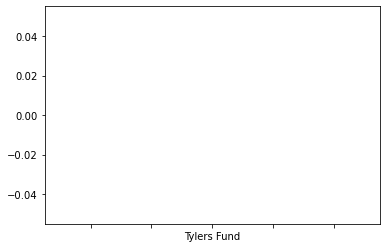

In [70]:
# Calculate rolling standard deviation
# Plot rolling standard deviation
portfolio_combined_std.rolling(window=21).mean().plot()

### Calculate and plot the correlation

<AxesSubplot:>

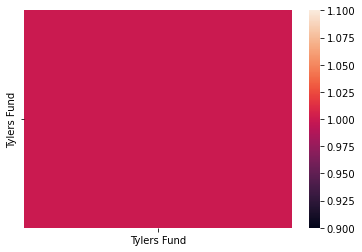

In [71]:
# Calculate and plot the correlation
correlation = portfolio_combined.corr()
sn.heatmap(correlation)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [64]:
# Calculate and plot Beta
Portfolio = covariance / variance

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [65]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = (portfolio_combined.mean() * 252) / ( portfolio_combined_std* np.sqrt(252))

<AxesSubplot:title={'center':'portfolio comparison'}>

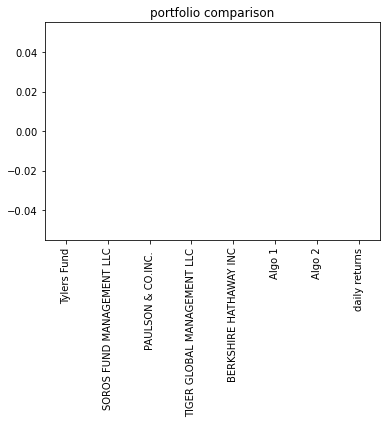

In [66]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title="portfolio comparison")

### How does your portfolio do?

Write your answer here!